In [312]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
import folium
%matplotlib inline

In [314]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


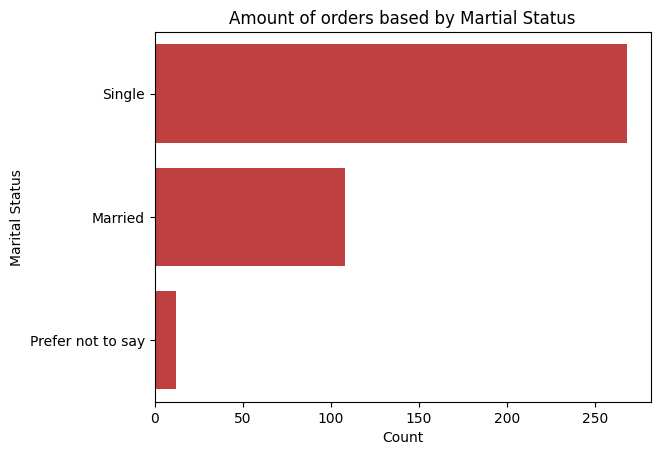

In [316]:
sns.countplot(data['Marital Status'], color='red', saturation=0.5)
plt.xlabel('Count')
plt.title('Amount of orders based by Martial Status')
plt.show()

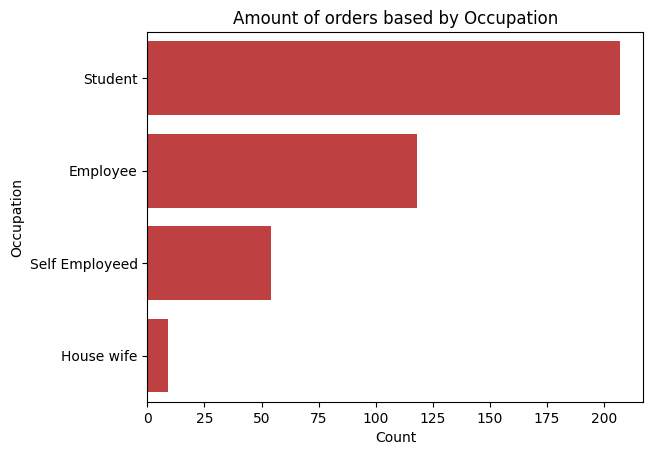

In [317]:
sns.countplot(data['Occupation'], color='red', saturation=0.5)
plt.xlabel('Count')
plt.title('Amount of orders based by Occupation')
plt.show()

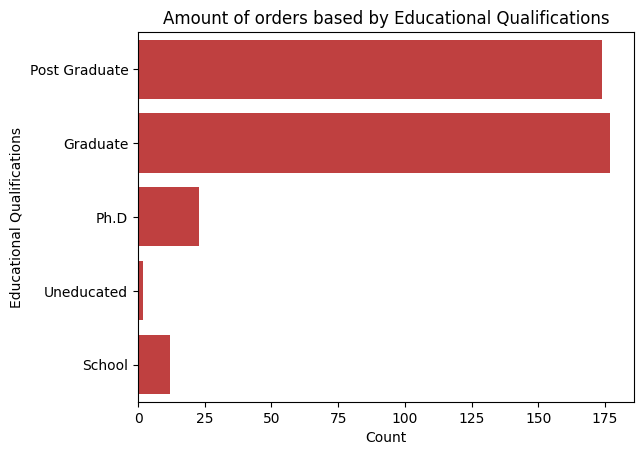

In [318]:
sns.countplot(data['Educational Qualifications'], color='red', saturation=0.5)
plt.xlabel('Count')
plt.title('Amount of orders based by Educational Qualifications')
plt.show()

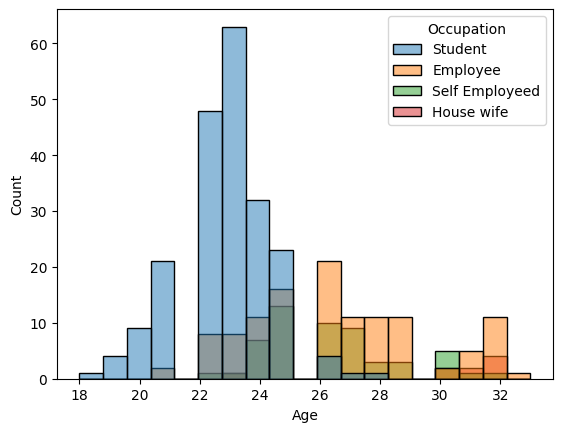

In [319]:
sns.histplot(data=data, x='Age', hue='Occupation')
plt.show()

Geo map

In [320]:
data['longitude'].sort_values(ascending=True)
data['longitude'].sort_values(ascending=False)
data['latitude'].sort_values(ascending=True)
data['latitude'].sort_values(ascending=False)

75     13.1020
140    13.1020
373    13.0809
244    13.0809
290    13.0734
        ...   
73     12.8845
325    12.8845
224    12.8834
311    12.8834
181    12.8652
Name: latitude, Length: 388, dtype: float64

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_79299/3113265071.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

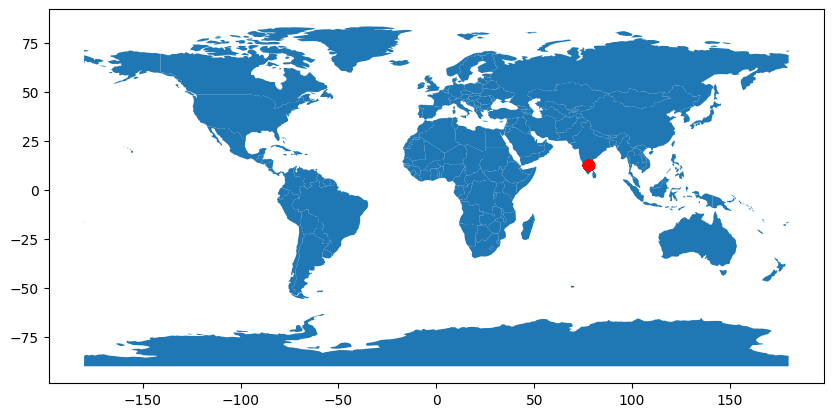

In [321]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10,6))

gdf.plot(ax=ax, color='red', markersize = 50)

In [322]:
m = folium.Map(location=[12, 75], zoom_start = 4)
for idx, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(m)
    
m.save('map.html')

In [323]:
m

Classification

In [324]:
#Map the text values

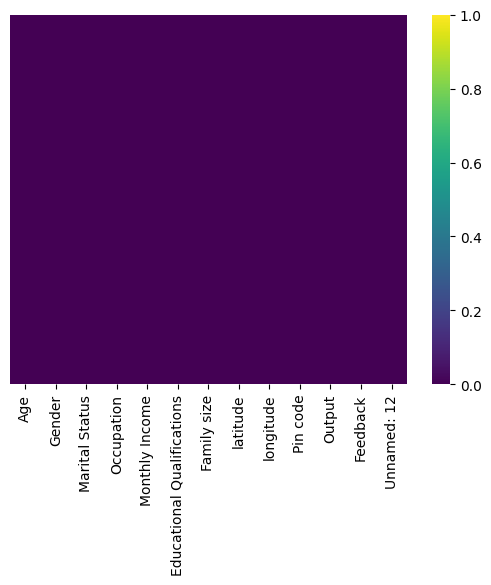

In [325]:
sns.heatmap(data.isnull(), yticklabels = False, linecolor= 'white', cbar = True, vmin = 0, vmax = 1, cmap = 'viridis')
plt.show()

In [326]:
data.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [327]:
data['Gender'].value_counts()
data['Marital Status'].value_counts()
data['Occupation'].value_counts()
data['Monthly Income'].value_counts()
data['Educational Qualifications'].value_counts()
data['Feedback'].value_counts()
data['Monthly Income'].value_counts()


Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

In [328]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
data['Marital Status'] = data['Marital Status'].map({'Single':1, 'Married':2, 'Prefer not to say':0})
data['Occupation'] = data['Occupation'].map({'Student':1, 'Employee':2, 'Self Employeed':3, 'House wife':4})
data['Monthly Income'] = data['Monthly Income'].map({'No Income':0, '25001 to 50000':1, 'More than 50000': 2, '10001 to 25000':3, 'Below Rs.10000': 4})
data['Educational Qualifications'] = data['Educational Qualifications'].map({'Uneducated': 0, 'Graduate':1, 'Post Graduate':2, 'Ph.D':3, 'School':4})
data['Feedback'] = data['Feedback'].map({"Positive": 1, "Negative ": 0})

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int64  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    int64  
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(9), object(2)


In [330]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,4,1,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,4,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,4,2,4,12.9850,77.5533,560010,Yes,1,Yes


In [331]:
from sklearn.model_selection import train_test_split

In [332]:
X = np.array(data[['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'Pin code', 'Feedback']])
y = np.array(data['Output'])

In [333]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=43)

In [334]:
from sklearn.ensemble import RandomForestClassifier

In [335]:
dtree = RandomForestClassifier()
dtree.fit(X_train,y_train)

RandomForestClassifier()

In [336]:
pred_tree = dtree.predict(X_test)
pred_tree

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [337]:
from sklearn.metrics import classification_report, confusion_matrix

In [338]:
print(confusion_matrix(y_test, pred_tree))
print('\n')
print(classification_report(y_test, pred_tree))

[[13 10]
 [ 4 90]]


              precision    recall  f1-score   support

          No       0.76      0.57      0.65        23
         Yes       0.90      0.96      0.93        94

    accuracy                           0.88       117
   macro avg       0.83      0.76      0.79       117
weighted avg       0.87      0.88      0.87       117



In [339]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", dtree.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Finding if the customer will order again:  ['Yes']
